In [107]:
#k- mean clustering 

# Importing the libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# Allow characters to appear in the notebook 
%matplotlib inline

In [108]:
# read the whole data 
dataset = pd.read_csv('cars.csv') 

In [109]:
# we dont need the last column brand becasue that the value we going to cluter into 
# so the last columns should include in the x values for that we can achive those by following equations
# or else we can see these - how we can get the columns with havinng last column 
X= dataset[dataset.columns[:-1]]
# make sure all the values im the dataset are numerics - anyway we can convert those into numberic 
# below code is the new way to convert the columns value into numeric 
X = X._convert(numeric=True)
X.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [110]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  259 non-null    float64
 3    hp           261 non-null    int64  
 4    weightlbs    258 non-null    float64
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 14.4 KB


In [111]:
# eliminate null values 
for i in X.columns:
#     we filling the null values by the means of the columns 
#     when we put the mean for filling the mean will be float so we should change that into 
#     int - so we are using the int() function

    X[i] = X[i].fillna(int(X[i].mean()))
# got some errors on converting the dataframe into integer 
# when there is any null or N/A value in the dataframe we cannot convert those value into 
# intefer so here we can use astype method to convert all our datframe into integer 
X =X.astype(np.int64)

for i in X.columns:
#     printing tht sum of sum value to recheck 
    print(X[i].isnull().sum())

    

0
0
0
0
0
0
0


In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mpg           261 non-null    int64
 1    cylinders    261 non-null    int64
 2    cubicinches  261 non-null    int64
 3    hp           261 non-null    int64
 4    weightlbs    261 non-null    int64
 5    time-to-60   261 non-null    int64
 6    year         261 non-null    int64
dtypes: int64(7)
memory usage: 14.4 KB


C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


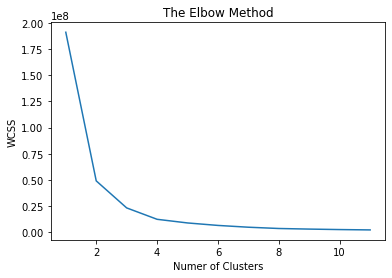

In [113]:
# Then we are here going to use the elbow method to find the optimal number of cluster 
from sklearn.cluster import KMeans

wcss = []

for i in range(1,12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Numer of Clusters')
plt.ylabel('WCSS')
plt.show()

In [125]:
# Aplly K-means to the car dataset 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
# when we do the predictio for untraioned model we will use the fit_predict method
y_kmeans = kmeans.fit_predict(X)

# X = X.to_numpy()

In [121]:
print(y_means)

[2 1 0 2 1 2 2 2 0 1 1 1 2 0 0 2 1 0 1 1 1 1 0 2 1 1 1 2 0 1 1 0 1 0 1 0 1
 1 2 0 2 2 0 0 0 1 2 1 1 0 2 0 0 1 2 2 0 1 1 2 0 1 0 1 2 0 1 1 1 2 0 1 1 1
 1 0 0 1 1 1 2 2 0 1 1 1 0 0 1 1 1 1 2 0 1 2 2 0 2 2 2 2 1 1 1 1 1 1 1 0 1
 0 2 1 1 2 0 0 1 2 1 1 2 0 1 1 2 1 1 1 1 1 2 0 2 2 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 1 1 2 0 1 0 1 1 1 0 0 2 0 0 1 0 0 1 0 1 1 0 0 1 1 1 2 0 0 1 0 1 2 0 1
 0 0 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 0 0 1 2 1 0 2 0 0 0 1 1 0 1 1 2 1 2 0 0
 2 2 2 1 2 1 1 0 0 1 1 2 0 1 2 0 1 1 2 0 2 1 2 0 2 1 1 1 1 1 0 2 0 1 2 1 0
 0 0]


In [126]:
print(X)

[[  14    8  350 ... 4209   12 1972]
 [  31    4   89 ... 1925   14 1980]
 [  17    8  302 ... 3449   11 1971]
 ...
 [  22    6  232 ... 2835   15 1983]
 [  18    6  232 ... 3288   16 1972]
 [  22    6  250 ... 3353   15 1977]]


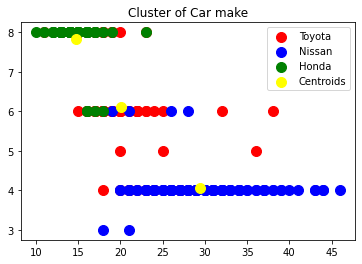

In [129]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s=100, c='red', label='Toyota')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s=100, c='blue', label='Nissan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s=100, c='green', label='Honda')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow', label='Centroids')
plt.title('Cluster of Car make')
plt.legend()
plt.show()